# TSF GRIP #GRIPSEPTEMBER21

## Task 1 : Prediction using Machine Learning



Importing all libraries required and reading in data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Analysing and exploring data

In [41]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting the distribution and visualising data

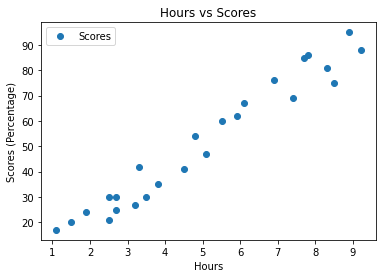

In [43]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores (Percentage)')  
plt.show()

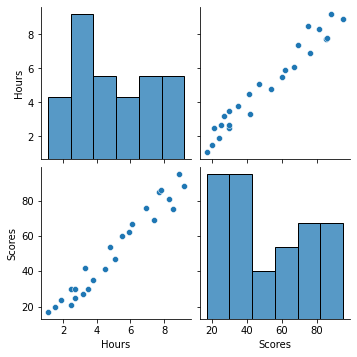

In [44]:
sns.pairplot(data = data, palette = 'viridus')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

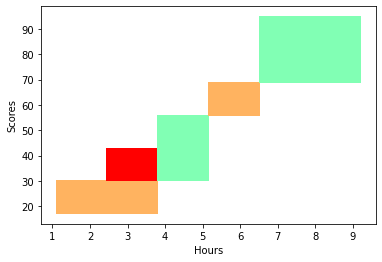

In [45]:
sns.histplot(data = data, x = 'Hours', y = 'Scores', cmap = 'rainbow')

 Splitting data and training it

In [46]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [47]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Training the Simple Linear Regression model

In [48]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training Succesful")

Training Succesful


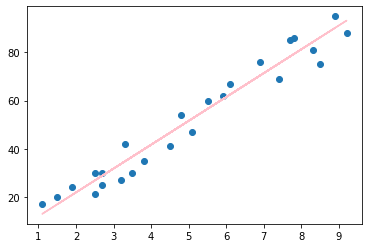

In [49]:
line = regressor.coef_ * x + regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line,color= 'pink');
plt.show()

In [50]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
ds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ds

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


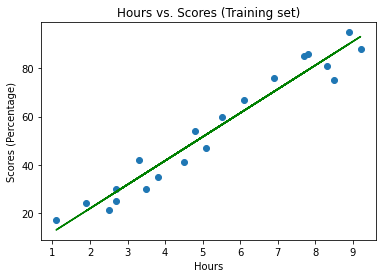

In [52]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'green')
plt.title('Hours vs. Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores (Percentage)')
plt.show()


Visualising the Test set results

In [53]:
data = np.array(9.25)
data = data.reshape(-1, 1)
pred = regressor.predict(data)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


Error Metrics

In [54]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [55]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9454906892105356
